# Africa nightlights histogram
In this notebook, we'll plot histograms of the nightlights distribution in Africa to determine how we should split our classes.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from PIL import Image
from neal_utils import *
from jake_utils import check_batch_within_africa_jake
import glob
from osgeo import gdal, osr

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#### Combining data and saving into one file

In [ ]:
tile2_fn = '/atlas/u/nj/viirs/2015/data/africa_nl/tile2_africa_nl.npy'
tile2_nl = np.load(tile2_fn)
tile5_fn = '/atlas/u/nj/viirs/2015/data/africa_nl/tile5_africa_nl.npy'
tile5_nl = np.load(tile5_fn)

In [ ]:
# Save into combined file
africa_nl = np.hstack((tile2_nl, tile5_nl))
print africa_nl.shape
africa_nl_fn = '/atlas/u/nj/viirs/2015/data/africa_nl/africa_nl.npy'
np.save(africa_nl_fn, africa_nl)

#### Loading all Africa nightlights

In [3]:
africa_nl_fn = '/atlas/u/nj/viirs/2015/data/africa_nl/africa_nl.npy'
africa_nl = np.load(africa_nl_fn)

In [4]:
africa_nl.shape

(144311147,)

In [21]:
import seaborn as sns

/atlas/software/cluster/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


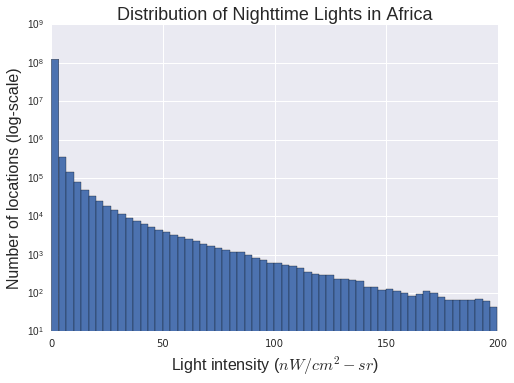

In [27]:
plt.figure()
plt.hist(africa_nl[np.logical_and((africa_nl > 0), (africa_nl <= 200))],
         bins=60, log=True)
plt.xlabel('Light intensity ($nW/cm^2 - sr$)', fontsize=16)
plt.ylabel('Number of locations (log-scale)', fontsize=16)
plt.title('Distribution of Nighttime Lights in Africa', fontsize=18)
plt.savefig('../plots/NL_distribution.eps', format='eps', dpi=1000)
plt.savefig('../plots/NL_distribution.png', format='png')
plt.show()